In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#replace following with suitable location in you Google drive 
path_to_zip_file = '/content/drive/MyDrive/Fall 2021/CSCE 676 Data Mining/jigsaw-toxic-comment-classification-challenge.zip'
directory_to_extract_to = '/content/drive/MyDrive/Fall 2021/CSCE 676 Data Mining/toxic comments unzip'

In [ ]:
import zipfile
def unzip_file(path_to_zip_file,directory_to_extract_to):
  with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
      zip_ref.extractall(directory_to_extract_to)

In [ ]:
"""
path_to_train_zip = '/content/drive/MyDrive/Fall 2021/CSCE 676 Data Mining/toxic comments unzip/train.csv.zip'
unzip_file(path_to_train_zip,directory_to_extract_to)
"""

"\npath_to_train_zip = '/content/drive/MyDrive/Fall 2021/CSCE 676 Data Mining/toxic comments unzip/train.csv.zip'\nunzip_file(path_to_train_zip,directory_to_extract_to)\n"

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = '/content/drive/MyDrive/Fall 2021/CSCE 676 Data Mining/toxic comments unzip'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['test.csv.zip', 'test_labels.csv.zip', 'train.csv.zip', 'test.csv', 'train.csv']


In [ ]:
import pandas as pd
from collections import Counter
import re
import string
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

import seaborn as sns
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

sns.set(style="white", context="talk")

%matplotlib inline

# Visualization

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Fall 2021/CSCE 676 Data Mining/toxic comments unzip/train.csv')  

In [ ]:
train

id  ... identity_hate
0       0000997932d777bf  ...             0
1       000103f0d9cfb60f  ...             0
2       000113f07ec002fd  ...             0
3       0001b41b1c6bb37e  ...             0
4       0001d958c54c6e35  ...             0
...                  ...  ...           ...
159566  ffe987279560d7ff  ...             0
159567  ffea4adeee384e90  ...             0
159568  ffee36eab5c267c9  ...             0
159569  fff125370e4aaaf3  ...             0
159570  fff46fc426af1f9a  ...             0

[159571 rows x 8 columns]

In [ ]:
train.loc[train.toxic == 1].count()

id               15294
comment_text     15294
toxic            15294
severe_toxic     15294
obscene          15294
threat           15294
insult           15294
identity_hate    15294
dtype: int64

In [ ]:
train.count()

id               159571
comment_text     159571
toxic            159571
severe_toxic     159571
obscene          159571
threat           159571
insult           159571
identity_hate    159571
dtype: int64

In [ ]:
# about 10% of them are positive

In [ ]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
COLUMNS = list(train.columns[2::])

In [ ]:
COLUMNS

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
train['clean'] = (train[COLUMNS].max(axis=1) == 0).astype(int)

In [ ]:
COLUMNS.append('clean')
CATEGORIES = COLUMNS.copy()

In [ ]:
color = ['peachpuff','violet','paleturquoise','pink','gold','darkgoldenrod','lightgreen']
clean_color = ['peachpuff','violet','paleturquoise','pink','gold','darkgoldenrod']

In [ ]:
df_distribution = train[COLUMNS].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

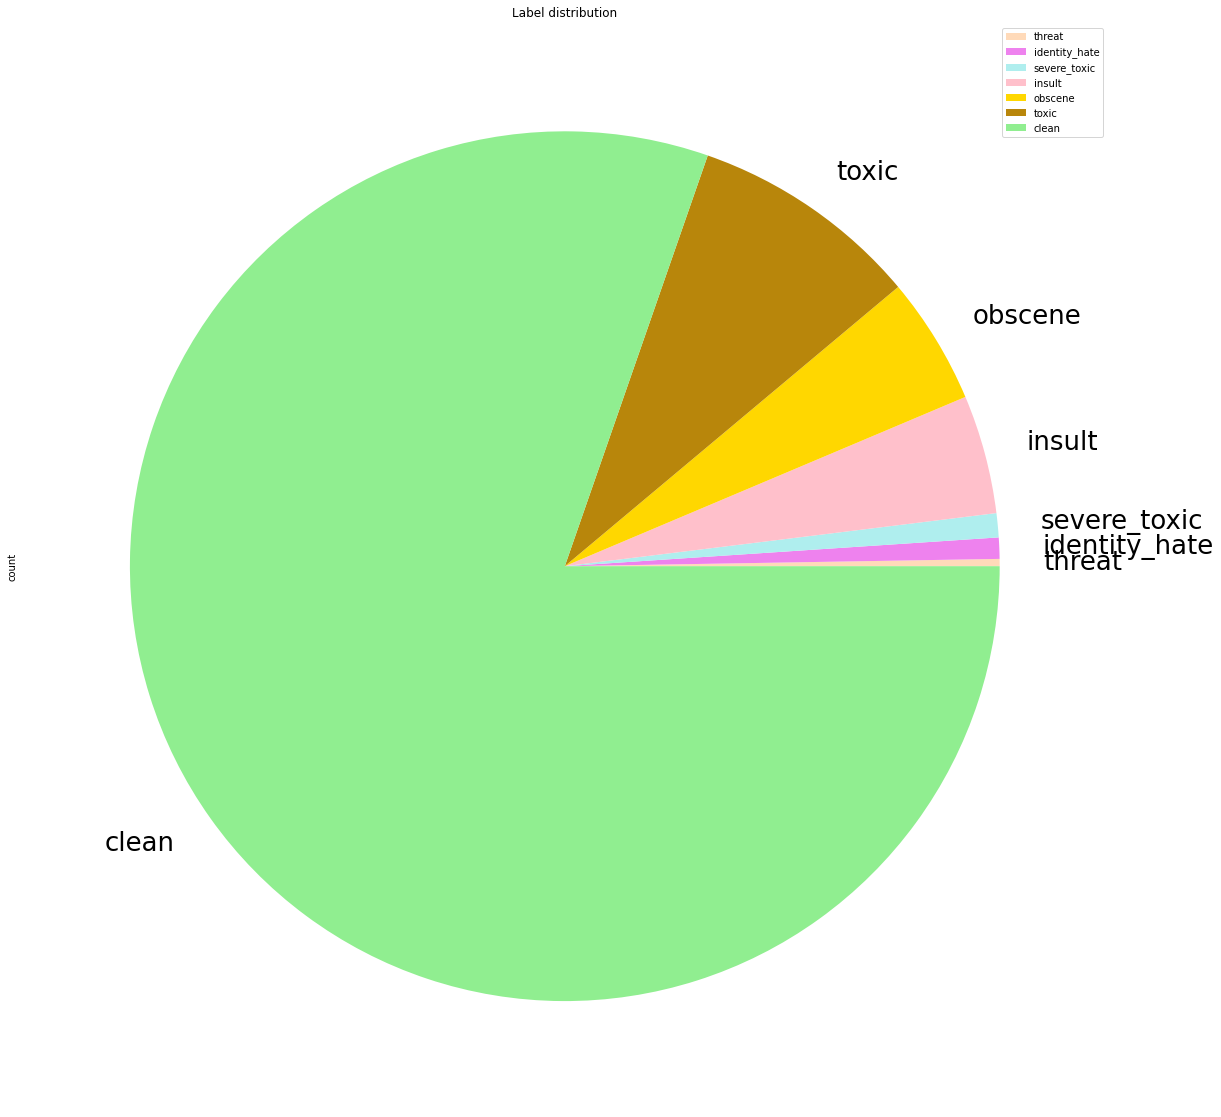

In [ ]:
df_distribution.plot.pie(y='count',
                                      title='Label distribution',
                                      figsize=(20,20),colors = color,textprops={'fontsize': 26})

#,autopct = "%.2f%%"

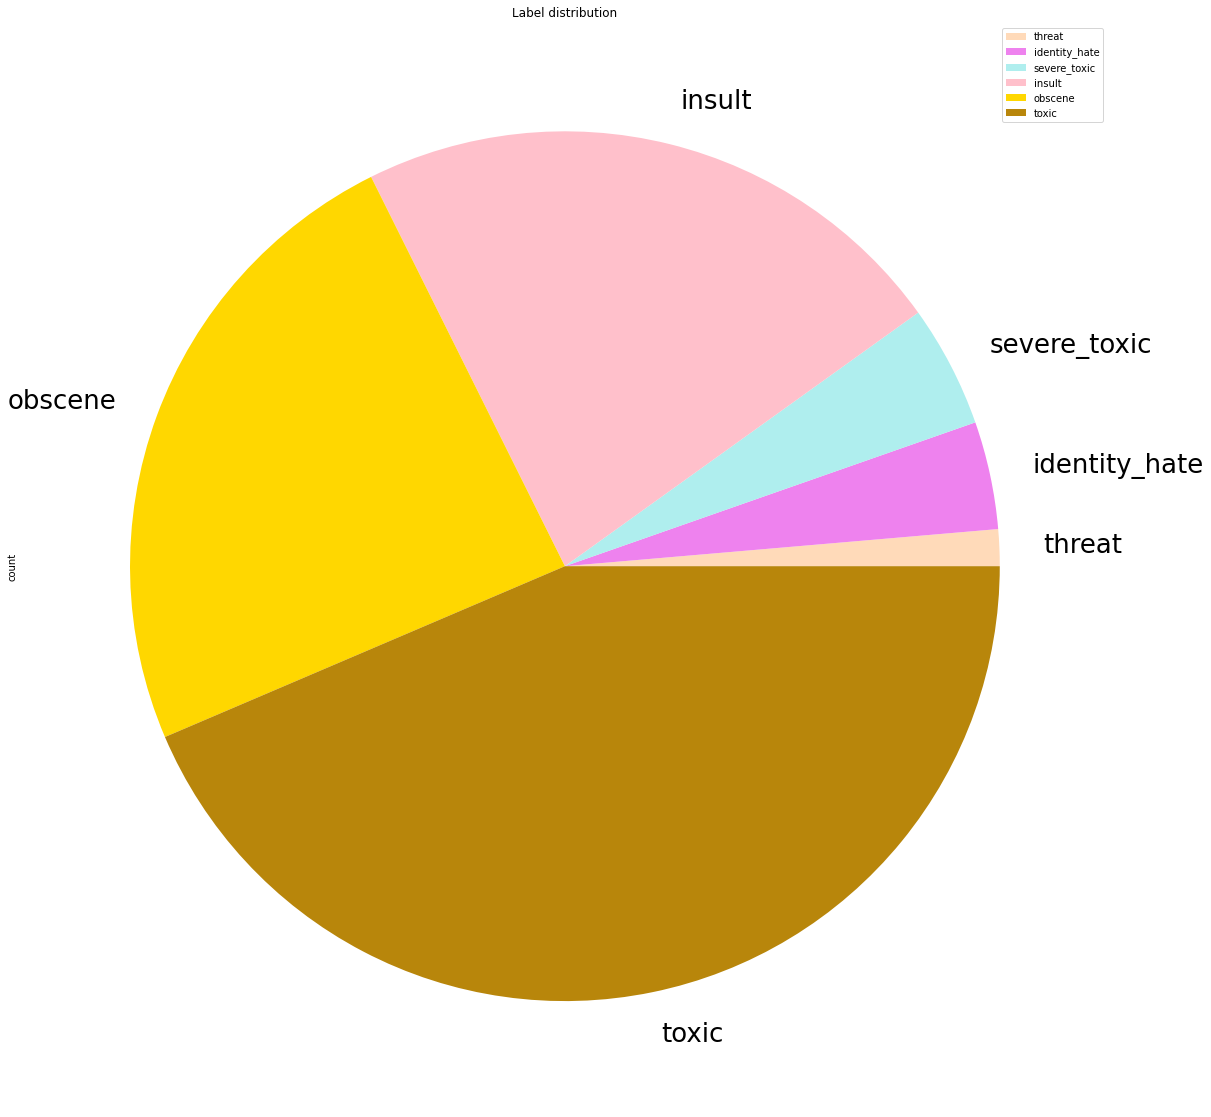

In [ ]:
df_distribution.drop("clean").plot.pie(y='count',
                                      title='Label distribution',
                                      figsize=(20,20),textprops={'fontsize': 26},colors = clean_color)
#,colors = ['pink', 'red', 'brown', 'blue', 'orange', 'yellow']

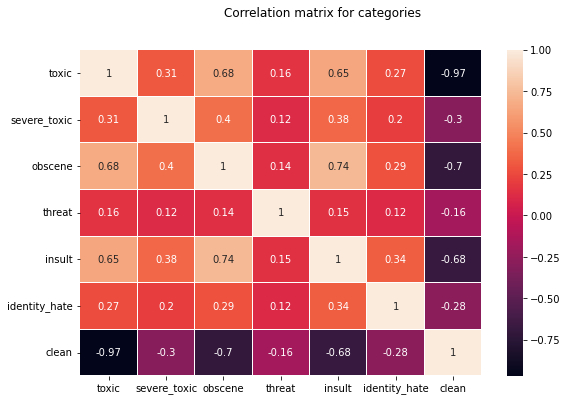

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(train[COLUMNS].corr(), annot=True, linewidths=.1, ax=ax)

In [ ]:
df_distribution.sort_values('count', ascending=False)

count
clean          143346
toxic           15294
obscene          8449
insult           7877
severe_toxic     1595
identity_hate    1405
threat            478

In [ ]:
df_train = train

In [ ]:
df_comb = df_train.groupby(COLUMNS)\
                    .size()\
                    .sort_values(ascending=False)\
                    .reset_index()\
                    .rename(columns={0: 'count'})
df_comb.head(n=10)

toxic  severe_toxic  obscene  threat  insult  identity_hate  clean   count
0      0             0        0       0       0              0      1  143346
1      1             0        0       0       0              0      0    5666
2      1             0        1       0       1              0      0    3800
3      1             0        1       0       0              0      0    1758
4      1             0        0       0       1              0      0    1215
5      1             1        1       0       1              0      0     989
6      1             0        1       0       1              1      0     618
7      0             0        1       0       0              0      0     317
8      0             0        0       0       1              0      0     301
9      1             1        1       0       1              1      0     265

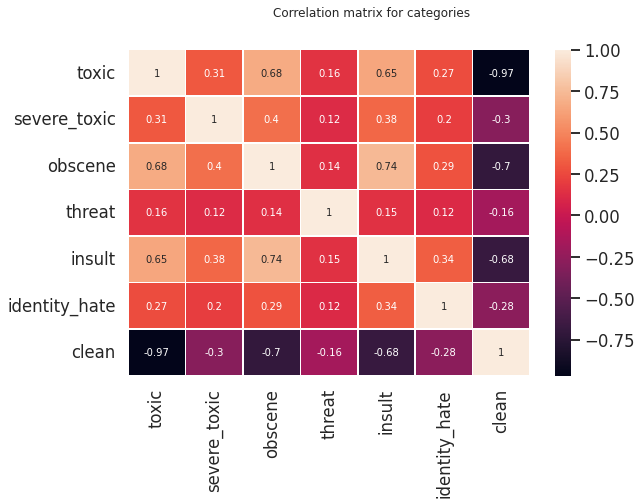

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(df_train[COLUMNS].corr(), annot=True, linewidths=.5, ax=ax)

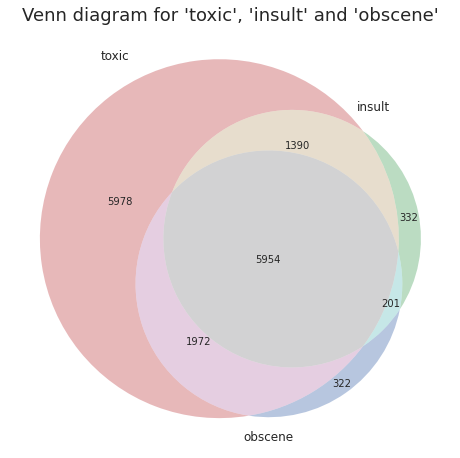

In [ ]:
t = df_train[(df_train['toxic'] == 1) & (df_train['insult'] == 0) & (df_train['obscene'] == 0)].shape[0]
i = df_train[(df_train['toxic'] == 0) & (df_train['insult'] == 1) & (df_train['obscene'] == 0)].shape[0]
o = df_train[(df_train['toxic'] == 0) & (df_train['insult'] == 0) & (df_train['obscene'] == 1)].shape[0]

t_i = df_train[(df_train['toxic'] == 1) & (df_train['insult'] == 1) & (df_train['obscene'] == 0)].shape[0]
t_o = df_train[(df_train['toxic'] == 1) & (df_train['insult'] == 0) & (df_train['obscene'] == 1)].shape[0]
i_o = df_train[(df_train['toxic'] == 0) & (df_train['insult'] == 1) & (df_train['obscene'] == 1)].shape[0]

t_i_o = df_train[(df_train['toxic'] == 1) & (df_train['insult'] == 1) & (df_train['obscene'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic', 'insult' and 'obscene'")
venn3(subsets = (t, i, t_i, o, t_o, i_o, t_i_o), 
      set_labels=('toxic', 'insult', 'obscene'))
plt.show()

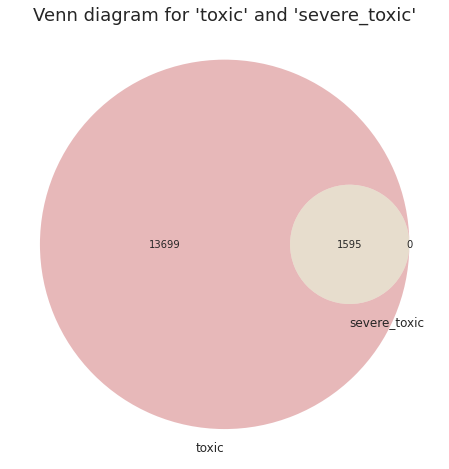

In [ ]:
t = df_train[(df_train['toxic'] == 1) & (df_train['severe_toxic'] == 0)].shape[0]
s = df_train[(df_train['toxic'] == 0) & (df_train['severe_toxic'] == 1)].shape[0]

t_s = df_train[(df_train['toxic'] == 1) & (df_train['severe_toxic'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'severe_toxic'))
plt.show()

In [ ]:
df_train['total_length'] = df_train['comment_text'].str.len()
df_train['new_line'] = df_train['comment_text'].str.count('\n'* 1)
df_train['new_small_space'] = df_train['comment_text'].str.count('\n'* 2)
df_train['new_medium_space'] = df_train['comment_text'].str.count('\n'* 3)
df_train['new_big_space'] = df_train['comment_text'].str.count('\n'* 4)

df_train['new_big_space'] = df_train['comment_text'].str.count('\n'* 4)
df_train['uppercase_words'] = df_train['comment_text'].apply(lambda l: sum(map(str.isupper, list(l))))
df_train['question_mark'] = df_train['comment_text'].str.count('\?')
df_train['exclamation_mark'] = df_train['comment_text'].str.count('!')

FEATURES = ['total_length', 
            'new_line', 
            'new_small_space', 
            'new_medium_space', 
            'new_big_space', 
            'uppercase_words',
            'question_mark',
            'exclamation_mark']
COLUMNS += FEATURES

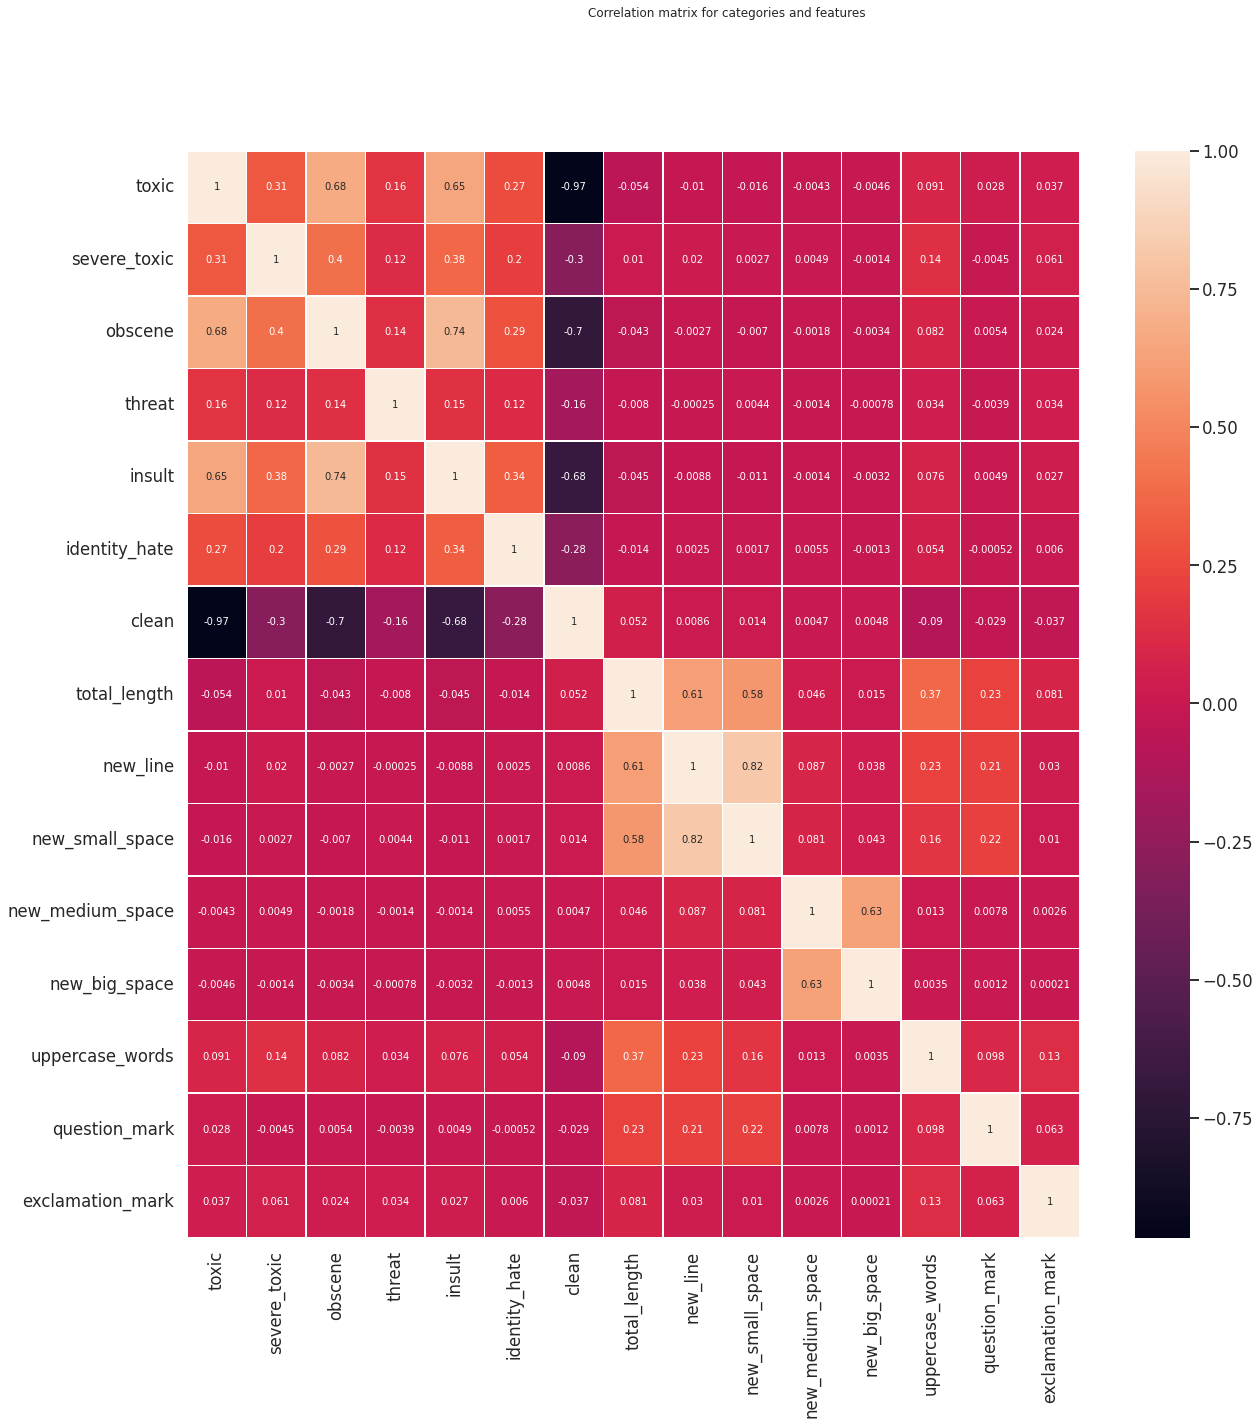

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
f.suptitle('Correlation matrix for categories and features')
sns.heatmap(df_train[COLUMNS].corr(), annot=True, linewidths=.5, ax=ax)

In [ ]:
word_counter = {}


def clean_text(text):
    text = re.sub('[{}]'.format(string.punctuation), ' ', text.lower())
    return ' '.join([word for word in text.split() if word not in (stop)])

for categ in CATEGORIES:
    d = Counter()
    df_train[df_train[categ] == 1]['comment_text'].apply(lambda t: d.update(clean_text(t).split()))
    word_counter[categ] = pd.DataFrame.from_dict(d, orient='index')\
                                        .rename(columns={0: 'count'})\
                                        .sort_values('count', ascending=False)

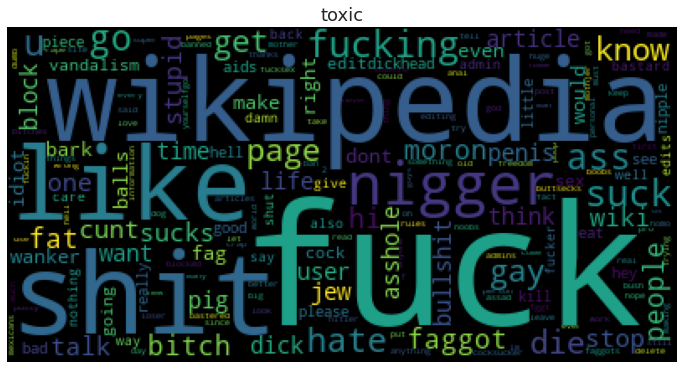

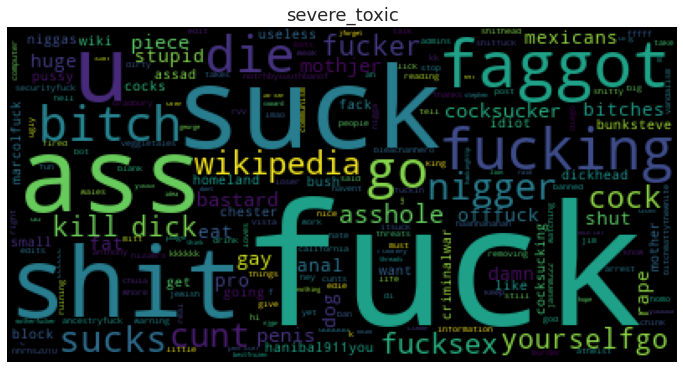

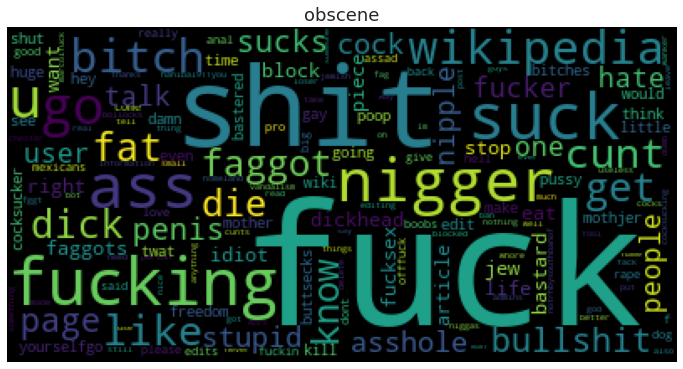

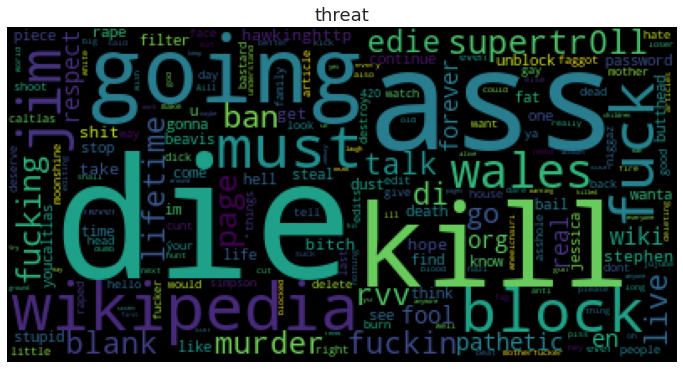

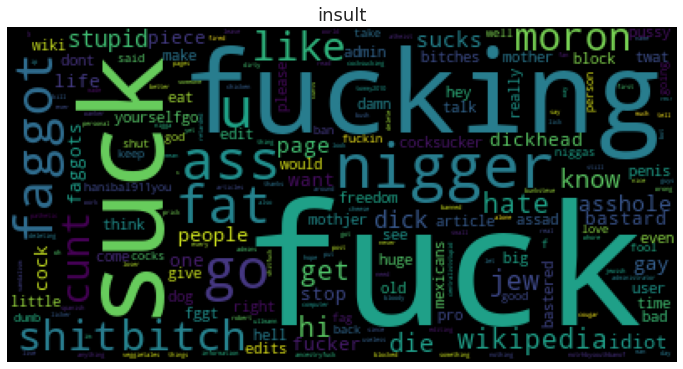

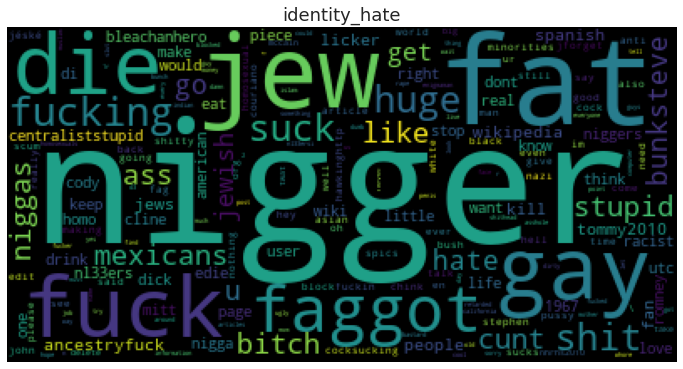

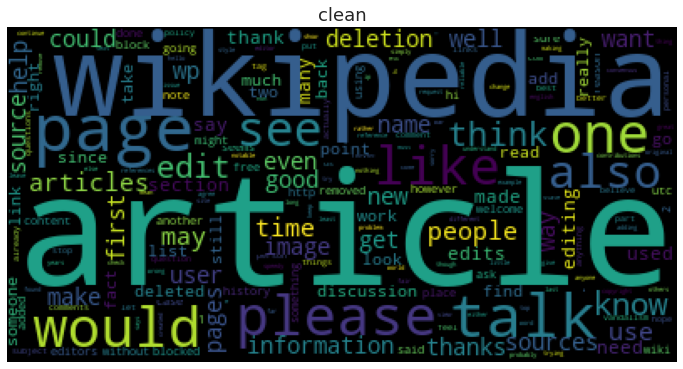

In [ ]:
for w in word_counter:
    wc = word_counter[w]

    wordcloud = WordCloud(
          background_color='black',
          max_words=200,
          max_font_size=100, 
          random_state=4561
         ).generate_from_frequencies(wc.to_dict()['count'])

    fig = plt.figure(figsize=(12, 12))
    plt.title(w)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fall 2021/CSCE 676 Data Mining/toxic comments unzip/train.csv')  

In [ ]:
df['exclamation mark counts'] = df['comment_text'].apply(lambda comment: comment.count('!'))
df['question marks counts'] = df['comment_text'].apply(lambda comment: comment.count('?'))
df['symbol counts'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '*&$%'))
df['length of tweet'] = df['comment_text'].apply(len)
df['amount of capitalsisation'] = df['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df['capitalization ratio'] = df.apply(lambda row: float(row['amount of capitalsisation'])/float(row['length of tweet']),
                                axis=1)
df['word counts'] = df['comment_text'].apply(lambda comment: len(comment.split()))
df['unique word counts'] = df['comment_text'].apply(
    lambda comment: len(set(w for w in comment.split())))
df['unique word ratio'] = df['unique word counts'] / df['word counts']
df['punctuation counts'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '.,;:'))
df['smilie emoji counts'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [ ]:
features = ('exclamation mark counts','question marks counts','symbol counts',
            'length of tweet', 'amount of capitalsisation', 'capitalization ratio',
            'word counts', 'unique word counts', 'unique word ratio',
            'punctuation counts', 'smilie emoji counts')
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')

rows = [{c:df[f].corr(df[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:
sns.set(font="Black",font_scale =1.5)

findfont: Font family ['Black'] not found. Falling back to DejaVu Sans.


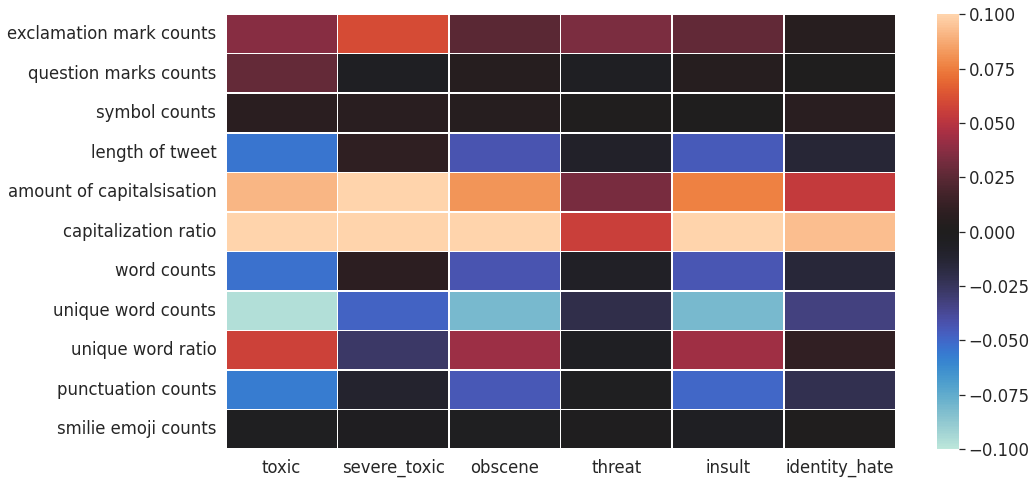

In [ ]:
ax = sns.heatmap(df_correlations,linewidths=0.5, center=0.0, vmin=-0.1, vmax=0.1)

In [ ]:
#code borrowed from some other kaggle proj flow for trimming purpose

import pandas as pd
import numpy as np
import copy
import re
from keras.preprocessing.text import text_to_word_sequence
from nltk import WordNetLemmatizer


class BaseTokenizer(object):
    def process_text(self, text):
        raise NotImplemented

    def process(self, texts):
        for text in texts:
            yield self.process_text(text)


RE_PATTERNS = {
    ' american ':
        [
            'amerikan'
        ],

    ' adolf ':
        [
            'adolf'
        ],


    ' hitler ':
        [
            'hitler'
        ],

    ' fuck':
        [
            '(f)(u|[^a-z0-9 ])(c|[^a-z0-9 ])(k|[^a-z0-9 ])([^ ])*',
            '(f)([^a-z]*)(u)([^a-z]*)(c)([^a-z]*)(k)',
            ' f[!@#\$%\^\&\*]*u[!@#\$%\^&\*]*k', 'f u u c',
            '(f)(c|[^a-z ])(u|[^a-z ])(k)', r'f\*',
            'feck ', ' fux ', 'f\*\*', 
            'f\-ing', 'f\.u\.', 'f###', ' fu ', 'f@ck', 'f u c k', 'f uck', 'f ck'
        ],

    ' ass ':
        [
            '[^a-z]ass ', '[^a-z]azz ', 'arrse', ' arse ', '@\$\$'
                                                           '[^a-z]anus', ' a\*s\*s', '[^a-z]ass[^a-z ]',
            'a[@#\$%\^&\*][@#\$%\^&\*]', '[^a-z]anal ', 'a s s'
        ],

    ' ass hole ':
        [
            ' a[s|z]*wipe', 'a[s|z]*[w]*h[o|0]+[l]*e', '@\$\$hole'
        ],

    ' bitch ':
        [
            'b[w]*i[t]*ch', 'b!tch',
            'bi\+ch', 'b!\+ch', '(b)([^a-z]*)(i)([^a-z]*)(t)([^a-z]*)(c)([^a-z]*)(h)',
            'biatch', 'bi\*\*h', 'bytch', 'b i t c h'
        ],

    ' bastard ':
        [
            'ba[s|z]+t[e|a]+rd'
        ],

    ' trans gender':
        [
            'transgender'
        ],

    ' gay ':
        [
            'gay'
        ],

    ' cock ':
        [
            '[^a-z]cock', 'c0ck', '[^a-z]cok ', 'c0k', '[^a-z]cok[^aeiou]', ' cawk',
            '(c)([^a-z ])(o)([^a-z ]*)(c)([^a-z ]*)(k)', 'c o c k'
        ],

    ' dick ':
        [
            ' dick[^aeiou]', 'deek', 'd i c k'
        ],

    ' suck ':
        [
            'sucker', '(s)([^a-z ]*)(u)([^a-z ]*)(c)([^a-z ]*)(k)', 'sucks', '5uck', 's u c k'
        ],

    ' cunt ':
        [
            'cunt', 'c u n t'
        ],

    ' bull shit ':
        [
            'bullsh\*t', 'bull\$hit'
        ],

    ' homo sex ual':
        [
            'homosexual'
        ],

    ' jerk ':
        [
            'jerk'
        ],

    ' idiot ':
        [
            'i[d]+io[t]+', '(i)([^a-z ]*)(d)([^a-z ]*)(i)([^a-z ]*)(o)([^a-z ]*)(t)', 'idiots'
                                                                                      'i d i o t'
        ],

    ' dumb ':
        [
            '(d)([^a-z ]*)(u)([^a-z ]*)(m)([^a-z ]*)(b)'
        ],

    ' shit ':
        [
            'shitty', '(s)([^a-z ]*)(h)([^a-z ]*)(i)([^a-z ]*)(t)', 'shite', '\$hit', 's h i t'
        ],

    ' shit hole ':
        [
            'shythole'
        ],

    ' retard ':
        [
            'returd', 'retad', 'retard', 'wiktard', 'wikitud'
        ],

    ' rape ':
        [
            ' raped'
        ],

    ' dumb ass':
        [
            'dumbass', 'dubass'
        ],

    ' ass head':
        [
            'butthead'
        ],

    ' sex ':
        [
            'sexy', 's3x', 'sexuality'
        ],


    ' nigger ':
        [
            'nigger', 'ni[g]+a', ' nigr ', 'negrito', 'niguh', 'n3gr', 'n i g g e r'
        ],

    ' shut the fuck up':
        [
            'stfu'
        ],

    ' pussy ':
        [
            'pussy[^c]', 'pusy', 'pussi[^l]', 'pusses'
        ],

    ' faggot ':
        [
            'faggot', ' fa[g]+[s]*[^a-z ]', 'fagot', 'f a g g o t', 'faggit',
            '(f)([^a-z ]*)(a)([^a-z ]*)([g]+)([^a-z ]*)(o)([^a-z ]*)(t)', 'fau[g]+ot', 'fae[g]+ot',
        ],

    ' mother fucker':
        [
            ' motha ', ' motha f', ' mother f', 'motherucker',
        ],

    ' whore ':
        [
            'wh\*\*\*', 'w h o r e'
        ],
}


class PatternTokenizer(BaseTokenizer):
    def __init__(self, lower=True, initial_filters=r"[^a-z0-9!@#\$%\^\&\*_\-,\.' ]", patterns=RE_PATTERNS,
                 remove_repetitions=True):
        self.lower = lower
        self.patterns = patterns
        self.initial_filters = initial_filters
        self.remove_repetitions = remove_repetitions

    def process_text(self, text):
        x = self._preprocess(text)
        for target, patterns in self.patterns.items():
            for pat in patterns:
                x = re.sub(pat, target, x)
        x = re.sub(r"[^a-z' ]", ' ', x)
        return x.split()

    def process_ds(self, ds):
        ### ds = Data series

        # lower
        ds = copy.deepcopy(ds)
        if self.lower:
            ds = ds.str.lower()
        # remove special chars
        if self.initial_filters is not None:
            ds = ds.str.replace(self.initial_filters, ' ')
        # fuuuuck => fuck
        if self.remove_repetitions:
            pattern = re.compile(r"(.)\1{2,}", re.DOTALL) 
            ds = ds.str.replace(pattern, r"\1")

        for target, patterns in self.patterns.items():
            for pat in patterns:
                ds = ds.str.replace(pat, target)

        ds = ds.str.replace(r"[^a-z' ]", ' ')

        return ds.str.split()

    def _preprocess(self, text):
        # lower
        if self.lower:
            text = text.lower()

        # remove special chars
        if self.initial_filters is not None:
            text = re.sub(self.initial_filters, ' ', text)

        # fuuuuck => fuck
        if self.remove_repetitions:
            pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
            text = pattern.sub(r"\1", text)
        return text

In [ ]:
train_preprocessed = train
#test = pd.read_csv("../input/test.csv")
    
tokenizer = PatternTokenizer()
train_preprocessed["comment_text"] = tokenizer.process_ds(train_preprocessed["comment_text"]).str.join(sep=" ")
#test["comment_text"] = tokenizer.process_ds(test["comment_text"]).str.join(sep=" ")
#train.to_csv("train_preprocessed.csv", index=False)
#test.to_csv("test_preprocessed.csv", index=False)


In [ ]:
word_counter = {}

for categ in CATEGORIES:
    d = Counter()
    train_preprocessed[train_preprocessed[categ] == 1]['comment_text'].apply(lambda t: d.update(clean_text(t).split()))
    word_counter[categ] = pd.DataFrame.from_dict(d, orient='index')\
                                        .rename(columns={0: 'count'})\
                                        .sort_values('count', ascending=False)

findfont: Font family ['Black'] not found. Falling back to DejaVu Sans.


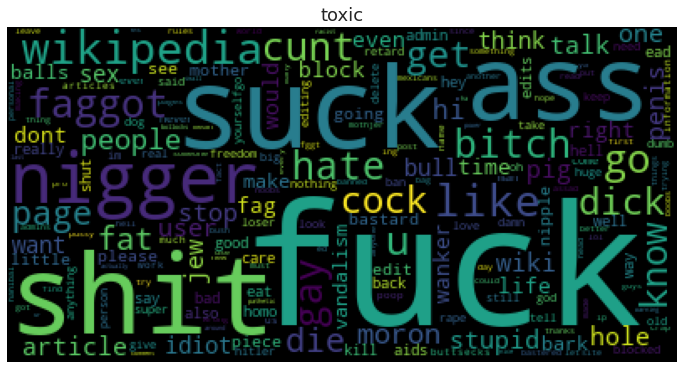

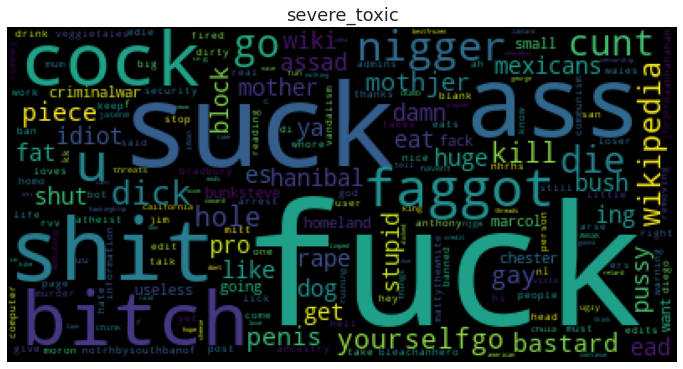

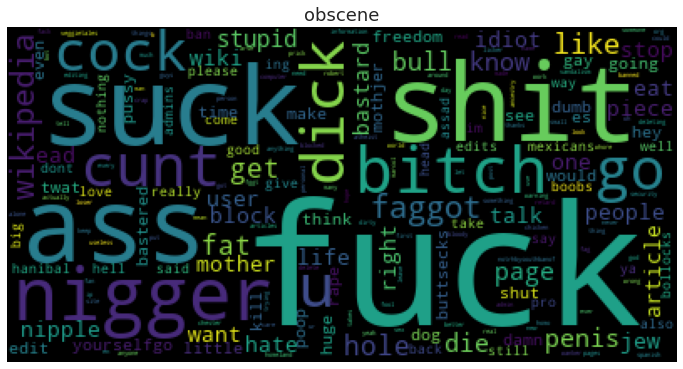

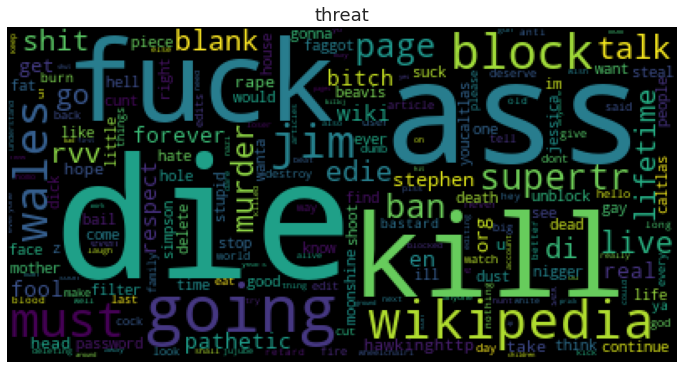

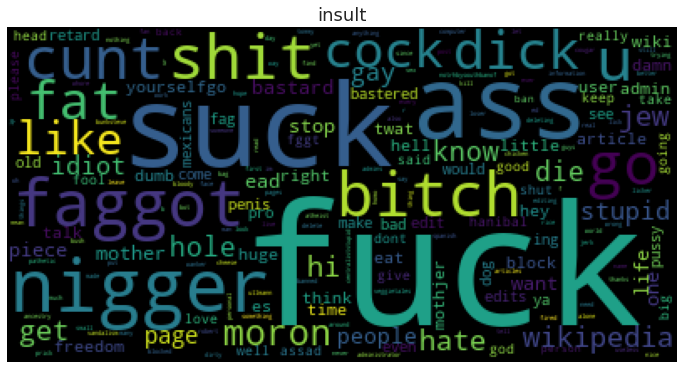

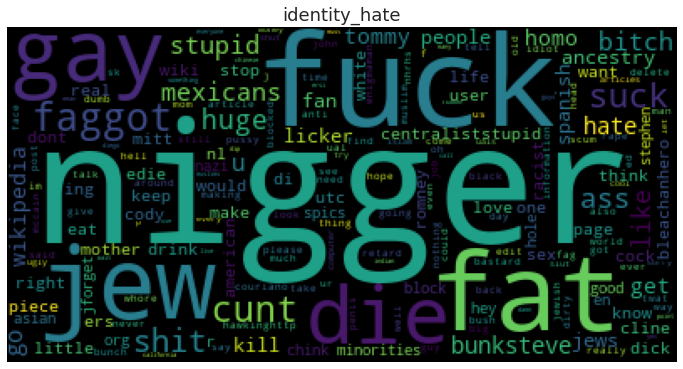

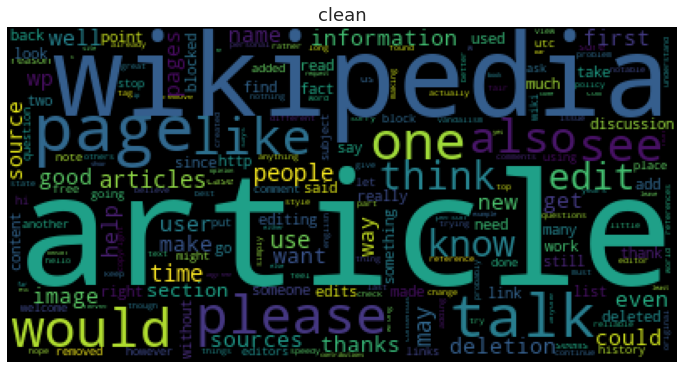

In [ ]:
for w in word_counter:
    wc = word_counter[w]

    wordcloud = WordCloud(
          background_color='black',
          max_words=200,
          max_font_size=100, 
          random_state=4561
         ).generate_from_frequencies(wc.to_dict()['count'])

    fig = plt.figure(figsize=(12, 8))
    plt.title(w)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()
#compare wordcloud with the original world cloud(without filtering)